In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
train_df = pd.read_csv('train.csv')
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


```
1) id: 고유 식별자
2) 성별: "남성", "여성" 또는 "기타"
3) 연령: 환자의 나이
4) 고혈압: 고혈압이 없는 경우 0, 고혈압이 있는 경우 1
5 ) heart_disease: 환자에게 심장 질환이 없는 경우 0, 심장 질환이 있는 경우 1 6
) ever_married: "아니오" 또는 "예"
7) work_type: "children", "Govt_jov", "Never_worked", "개인" 또는 "자영업자"
8) 거주 유형: "시골" 또는 "도시"
9) avg_glucose_level: 평균 혈중 포도당 수치
10) bmi: 체질량 지수
11) smoking_status: "과거 흡연자", "비흡연자", "연기"또는 "알 수 없음"*
12) 뇌졸중: 환자에게 뇌졸중이 있으면 1, 그렇지 않으면 0
*참고: smoking_status의 "알 수 없음"은 이 환자에 대한 정보를 사용할 수 없음을 의미합니다.
```

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

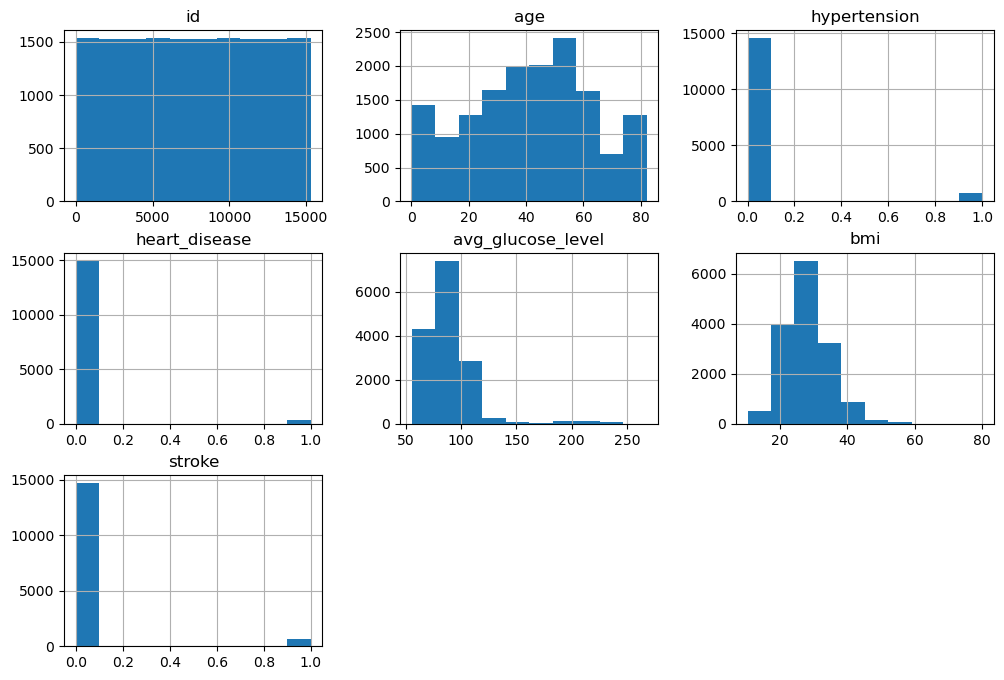

In [8]:
train_df.hist(figsize=(12,8))

**target 분포 확인**

<AxesSubplot:xlabel='stroke', ylabel='count'>

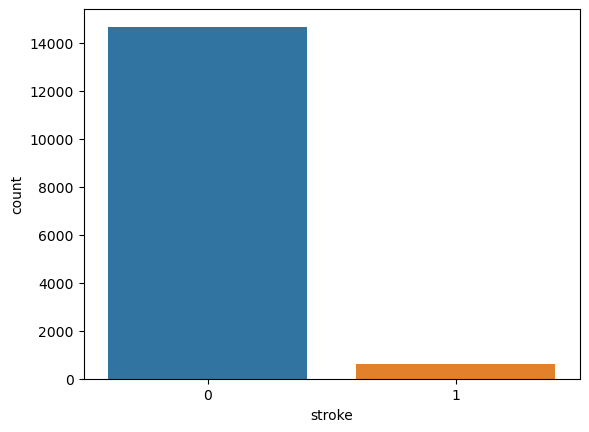

In [9]:
sns.countplot(data=train_df, x='stroke')

In [10]:
train_df['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [11]:
train_df.corrwith(train_df['stroke']).sort_values(ascending=False)

stroke               1.000000
age                  0.261320
avg_glucose_level    0.149273
hypertension         0.145895
heart_disease        0.111518
bmi                  0.065393
id                  -0.017290
dtype: float64

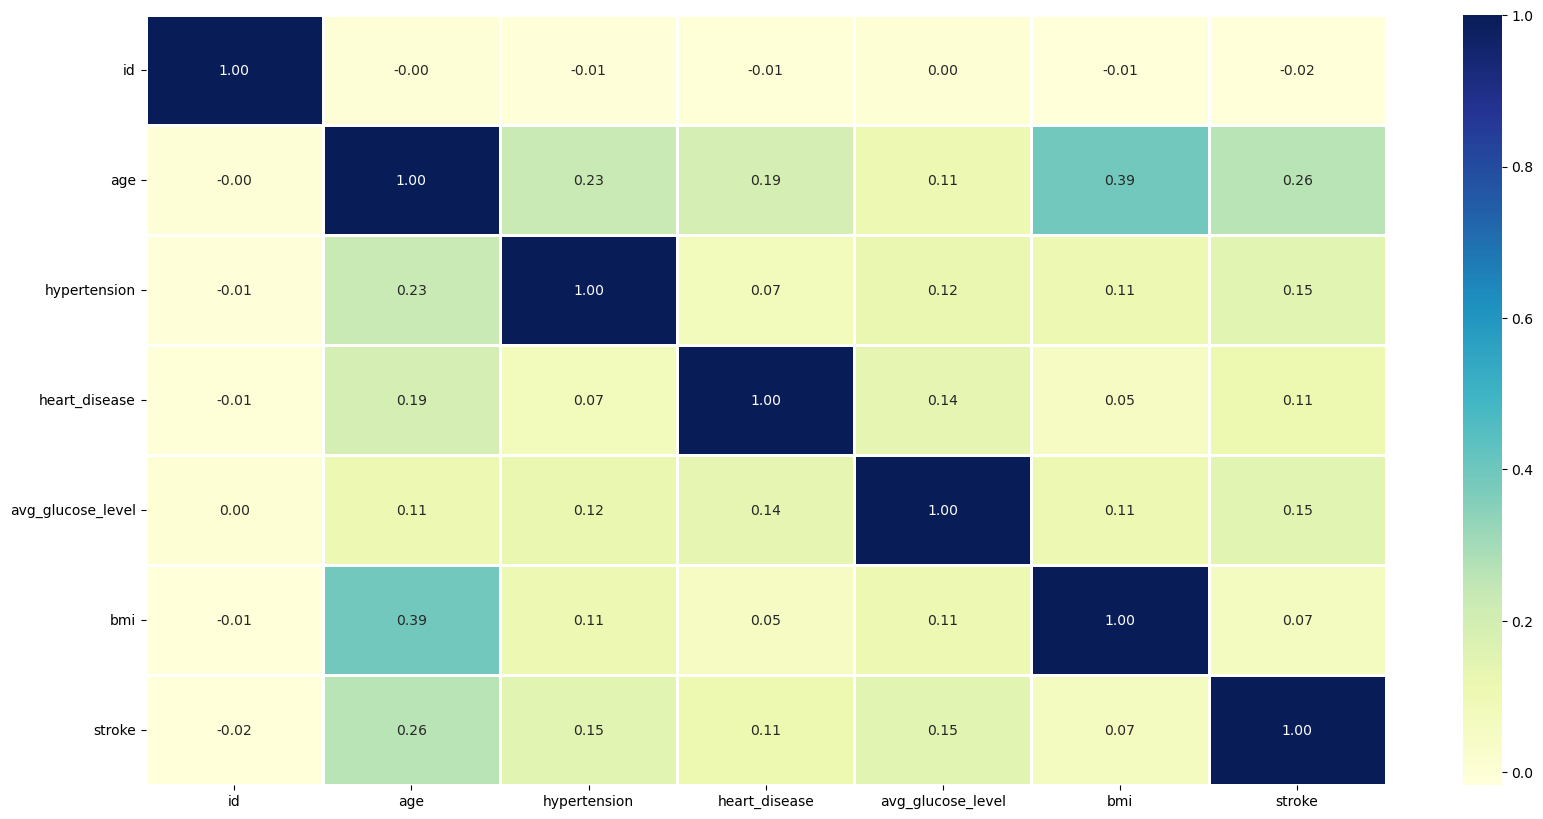

In [52]:
# heatmap
plt.figure(figsize=(20, 10))

sns.heatmap(data=train_df.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidth=1.0)
plt.show()

- 특이값 확인

In [33]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


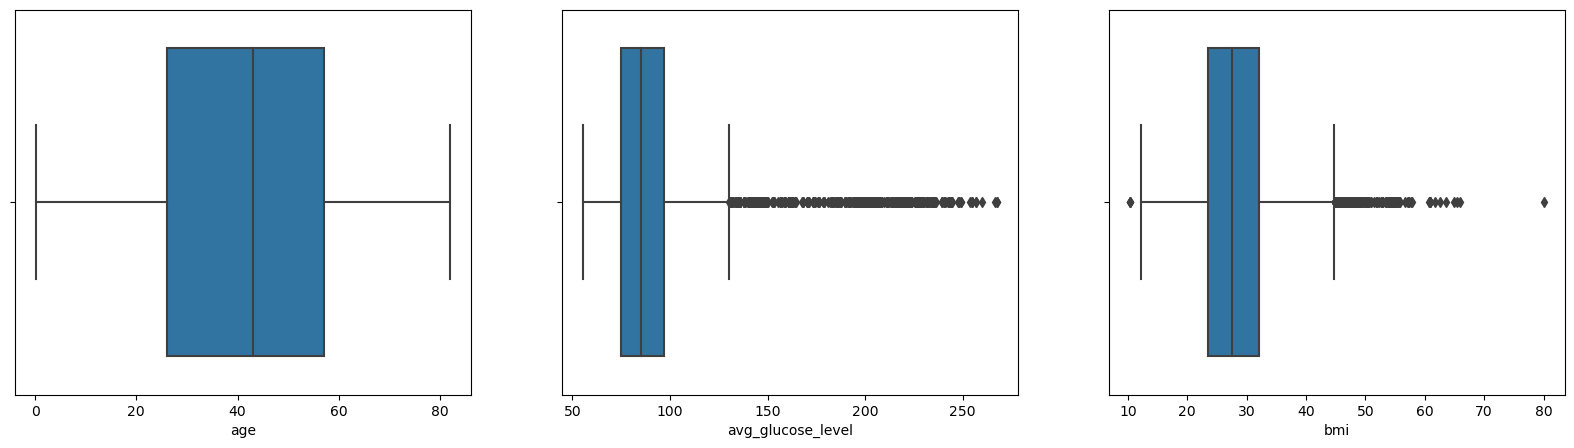

In [48]:
cat_columns = ['age', 'avg_glucose_level','bmi']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, column in enumerate(cat_columns):
    sns.boxplot(data=train_df, x=column, ax=axes[i])
plt.show()

In [12]:
# object type data 정보
train_df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


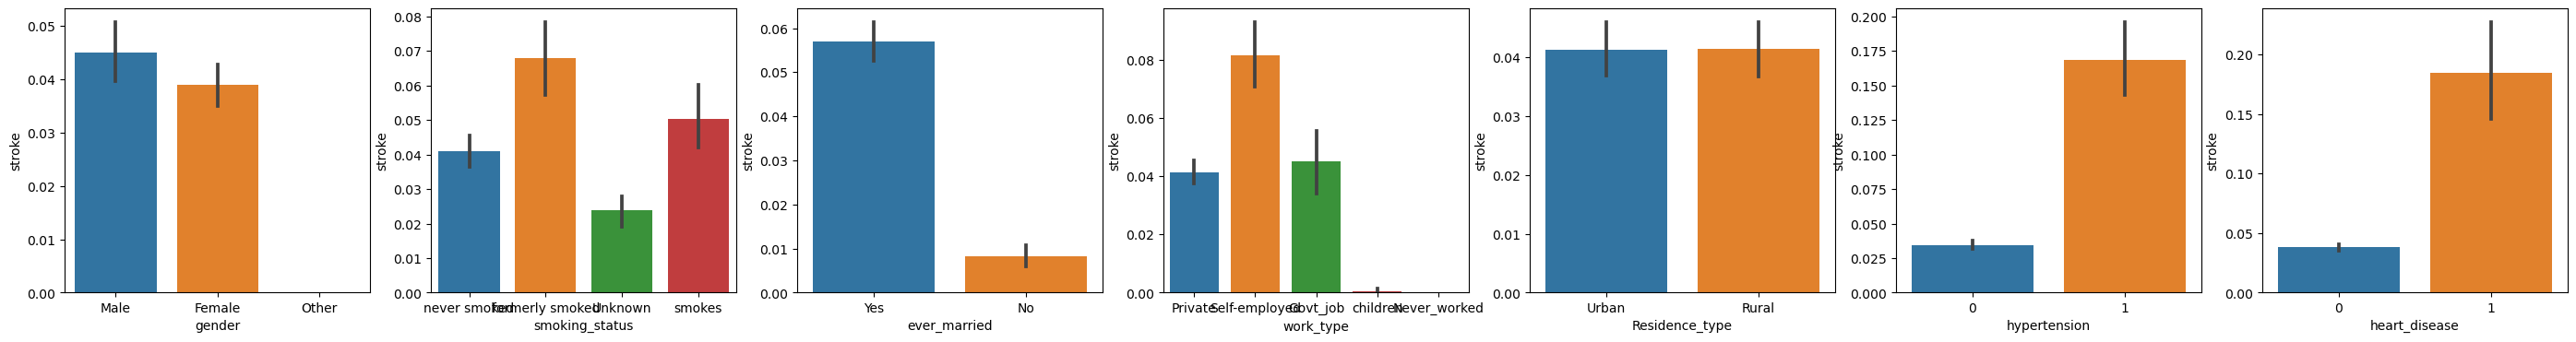

In [31]:
# 범주형 데이터
cat_columns = ['gender', 'smoking_status', 'ever_married', 'work_type', 'Residence_type','hypertension', 'heart_disease']
            
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(35,4))
for i, column in enumerate(cat_columns):
    sns.barplot(data=train_df, x=column, y='stroke', ax=axes[i])
plt.show()

In [13]:
train_df['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [14]:
# stroke 환자의 데이터만 보기

In [15]:
#stroke_df = train_df[train_df['stroke']==1]

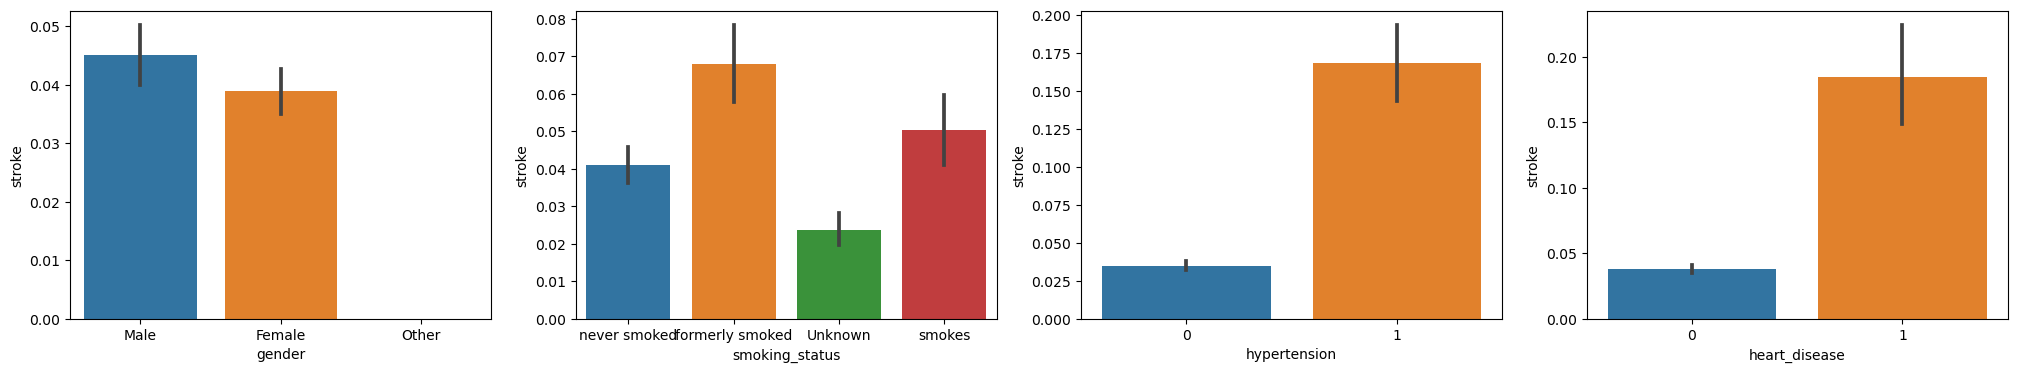

In [44]:
# 범주형 데이터
cat_columns = ['gender', 'smoking_status','hypertension', 'heart_disease']
            
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,4))
for i, column in enumerate(cat_columns):
    sns.barplot(data=train_df, x=column, y='stroke', ax=axes[i])
plt.show()

### 데이터 전처리

In [37]:
# 특성데이터 분리
X_train = train_df.drop('stroke', axis=1)
y_train = train_df['stroke']

- 수치형 데이터 전처리

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [53]:
# 수치형 데이터만 준비
# train_num = train_df.select_dtypes(include=[np.number])
# train_num.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [14]:
# 데이터 타입 바꿔주기
train_df = train_df.astype({'age' : 'int' })
train_df = train_df.astype({'avg_glucose_level' : 'int' })
train_df = train_df.astype({'bmi' : 'int' })
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 15304 non-null  int64 
 1   gender             15304 non-null  object
 2   age                15304 non-null  int32 
 3   hypertension       15304 non-null  int64 
 4   heart_disease      15304 non-null  int64 
 5   ever_married       15304 non-null  object
 6   work_type          15304 non-null  object
 7   Residence_type     15304 non-null  object
 8   avg_glucose_level  15304 non-null  int32 
 9   bmi                15304 non-null  int32 
 10  smoking_status     15304 non-null  object
 11  stroke             15304 non-null  int64 
dtypes: int32(3), int64(4), object(5)
memory usage: 1.2+ MB


In [15]:
train_df.dtypes

id                    int64
gender               object
age                   int32
hypertension          int64
heart_disease         int64
ever_married         object
work_type            object
Residence_type       object
avg_glucose_level     int32
bmi                   int32
smoking_status       object
stroke                int64
dtype: object

In [16]:
train_num = train_df[['age','avg_glucose_level','bmi']]

In [17]:
# 특이값이 많으므로 정규화는 적절하지 않다고 판단, 수치형 데이터에 모두 표준화 적용
std_scaler = StandardScaler()
train_num_std = std_scaler.fit_transform(train_num)
train_num_std.mean(0), train_num_std.std(0)

(array([-1.41374976e-16, -1.30464263e-16, -1.39285690e-17]),
 array([1., 1., 1.]))

In [18]:
# 특이값이 많고 꼬리가 긴 형태인 컬럼('avg_glucose_level','bmi')은 로그 변환 적용
from sklearn.preprocessing import FunctionTransformer
log_num = train_df[['avg_glucose_level','bmi']]

log_transformer = FunctionTransformer(np.log1p)
log_train = log_transformer.fit_transform(log_num)

- 파이프라인 만들기

In [19]:
# 로그 파이프라인
log_attribs = log_num.columns

log_pipeline = Pipeline([
                        ("log_transfomer", FunctionTransformer(np.log1p)),  # 로그 변환
                        ("std_scaler", StandardScaler())   # 표준화
                              ])

- 범주형 데이터 전처리

In [3]:
train_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [26]:
#  one hot 인코딩
train_cat = train_df[['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']]

onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(train_cat)　

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [32]:
onehot_encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [12]:
X_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [22]:
# full pipeline
from sklearn.compose import ColumnTransformer

log_attribs = ['avg_glucose_level','bmi']
std_attribs = ['age']
cat_attribs = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

full_pipeline = ColumnTransformer([
                                   ('log_pipeline', log_pipeline, log_attribs),  
                                   ('std_pipeline', StandardScaler(), std_attribs),
                                   ('oh_encoder', OneHotEncoder(), cat_attribs), 
                                   ('pass', 'passthrough', ['id','hypertension', 'heart_disease'])
                                  ])

In [23]:
from sklearn import set_config
set_config(display='diagram')

In [27]:
full_pipeline

ColumnTransformer(transformers=[('log_pipeline',
                                 Pipeline(steps=[('log_transfomer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['avg_glucose_level', 'bmi']),
                                ('std_pipeline', StandardScaler(), ['age']),
                                ('oh_encoder', OneHotEncoder(),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status']),
                                ('pass', 'passthrough',
                                 ['id', 'hypertension', 'heart_disease'])])

In [28]:
X_prepared = full_pipeline.fit_transform(X＿ｔｒａｉｎ)

In [29]:
X＿ｔｒａｉｎ.shape, X_prepared.shape

((15304, 11), (15304, 22))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [34]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
rf_reg = RandomForestRegressor(random_state=42)

In [44]:
# LinearRegression 교차검증
lin_scores = cross_val_score(lin_reg, X_prepared, y_train, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
lin_rmse = np.sqrt(-lin_scores.mean())
lin_rmse

0.18870614721660273

In [39]:
# DecisionTree 교차검증
tree_scores = cross_val_score(tree_reg, X_prepared, y_train, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse = np.sqrt(-tree_scores.mean())
tree_rmse

0.27160919254003335

In [40]:
# RandomForest 교차검증
rf_scores = cross_val_score(rf_reg, X_prepared, y_train, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
rf_rmse = np.sqrt(-rf_scores.mean())
rf_rmse

0.19209389122416318

# 모델 세부 튜닝

그리드 탐색

In [42]:
from sklearn.model_selection import GridSearchCV

rf_reg = RandomForestRegressor(random_state=42)

param_grid = {'n_estimators' : [30, 50, 100], 'max_features' : [2, 4, 6, 8]} 

grid_search = GridSearchCV(rf_reg, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) 
%time grid_search.fit(X_prepared, y_train)

Wall time: 10.1 s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [45]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, random_state=42)

In [46]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

0.19544965287617894 {'max_features': 2, 'n_estimators': 30}
0.1951741272468676 {'max_features': 2, 'n_estimators': 50}
0.19238725448468127 {'max_features': 2, 'n_estimators': 100}
0.1948901356393197 {'max_features': 4, 'n_estimators': 30}
0.1935224702098402 {'max_features': 4, 'n_estimators': 50}
0.19142367778966823 {'max_features': 4, 'n_estimators': 100}
0.19493053907420263 {'max_features': 6, 'n_estimators': 30}
0.19305347547778814 {'max_features': 6, 'n_estimators': 50}
0.19111160299612157 {'max_features': 6, 'n_estimators': 100}
0.1942661827369134 {'max_features': 8, 'n_estimators': 30}
0.1931562887293481 {'max_features': 8, 'n_estimators': 50}
0.19175125926091388 {'max_features': 8, 'n_estimators': 100}


랜덤 탐색

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'n_estimators' : randint(low=1, high=200),
                  'max_features' : randint(low=1, high=8)}

rnd_search = RandomizedSearchCV(rf_reg, param_distribs, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)                  
rnd_search.fit(X_prepared, y_train)

Wall time: 11.2 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002095E501D60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002095E501D90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [48]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [49]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [50]:
cv_results = rnd_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

0.19020338067233586 {'max_features': 7, 'n_estimators': 180}
0.19605041191290556 {'max_features': 5, 'n_estimators': 15}
0.19159550404224007 {'max_features': 3, 'n_estimators': 72}
0.19484548387525916 {'max_features': 5, 'n_estimators': 21}
0.19067770168451623 {'max_features': 7, 'n_estimators': 122}
0.1913715486942466 {'max_features': 3, 'n_estimators': 75}
0.19124421463036406 {'max_features': 3, 'n_estimators': 88}
0.19075031811689513 {'max_features': 5, 'n_estimators': 100}
0.19058043154518367 {'max_features': 3, 'n_estimators': 150}
0.22888530343172658 {'max_features': 5, 'n_estimators': 2}


In [51]:
best_model = grid_search.best_estimator_

In [52]:
feature_importances = best_model.feature_importances_

In [69]:
log_attribs2 = ['avg_glucose_level','bmi']
std_attribs2 = ['age']
pass_attribs2 = ['id','hypertension', 'heart_disease']
cat_attribs2 = ['Female', 'Male', 'Other','No', 'Yes','Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children','Rural', 'Urban','Unknown', 'formerly smoked', 'never smoked', 'smokes']

attributes = log_attribs2 + std_attribs2 + cat_attribs2 + pass_attribs2

In [70]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.21866972374226856, 'avg_glucose_level'),
 (0.2166832004102462, 'age'),
 (0.1914419748635998, 'id'),
 (0.1737067476518498, 'bmi'),
 (0.01720581193066899, 'Rural'),
 (0.016736710225798646, 'never smoked'),
 (0.016678399231018375, 'Urban'),
 (0.016533760888545728, 'hypertension'),
 (0.01596418569655845, 'Female'),
 (0.014598720609050136, 'formerly smoked'),
 (0.014201597874707511, 'Male'),
 (0.013896936639324078, 'heart_disease'),
 (0.01352967313431167, 'smokes'),
 (0.0134195479829147, 'Private'),
 (0.012838928406515215, 'Unknown'),
 (0.012166775959534934, 'Self-employed'),
 (0.00964676275184138, 'Govt_job'),
 (0.0061017872906187435, 'Yes'),
 (0.005577154733426333, 'No'),
 (0.0004014390125436936, 'children'),
 (1.6096465719453074e-07, 'Never_worked'),
 (0.0, 'Other')]